# Surprise Housing - Housing Price Predication & Analysis Project


In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic Numerical Computation Library in Python
import seaborn as sns # For Purpose of Visualization
import matplotlib.pyplot as plt # Plotting Package
import warnings 
warnings.filterwarnings('ignore') # Filtering warnings
%matplotlib inline

In [3]:
# importing dataset Train CSV file using Pandas libarary
df = pd.read_csv('train.csv')

In [4]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
df.head()

No. of Rows : 1168
No. of Columns : 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# Dataset Information :
* Dataset consist of two CSV files, one for training model & other for testing dataset.
* Training dataset contain 1168 Rows & 81 Columns.
* We can see there are some missing values are present in dataset.

# Dataset Feature Description :

In [5]:
# As we have too many columns let sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

# Data Integrity check

In [6]:
df.duplicated().sum()

0

# Check for presense of any whitespaces, '?', 'NA', '-' in dataset


In [7]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()


False

# Missing value check


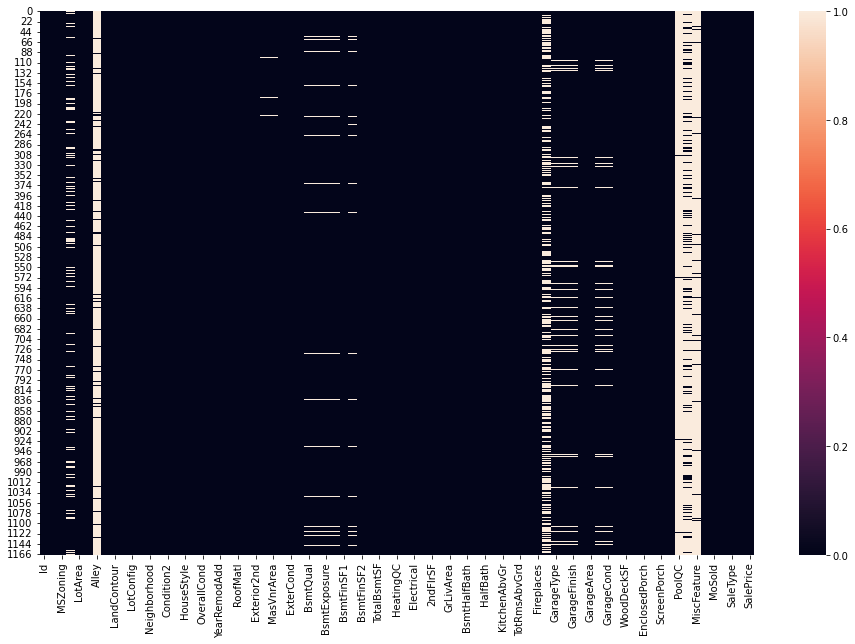

In [8]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [9]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageYrBlt                64        5.479452
GarageFinish               64        5.479452
GarageType                 64        5.479452
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
Id                          0        0.000000
Functional                  0        0.000000
Fireplaces                  0     

# Missing Values Imputation


# 1. Missing Value Imputation in PoolQC


# PoolQC description:

In [10]:

df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

* Feature Pool Quality contain more than 99 % missing data, so We can drop feature.


# 2. Missing Value Imputation in MiscFeature, Alley, Fence, FireplaceQC


In [11]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)


# 3. Missing Value Imputation in Lot Frontage


# LotFrontage: Linear feet of street connected to property



* LotFrontage is numerical feature which can imputate based mean or median value. Lets Check boxplot & distribution of LotFrontage feature



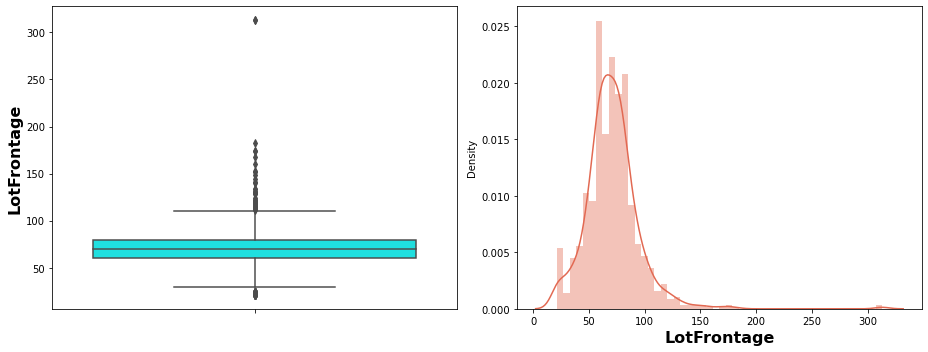

In [12]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'LotFrontage', data= df, color='cyan')
plt.ylabel('LotFrontage', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['LotFrontage'])
plt.xlabel('LotFrontage', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
print('Mean of LotFrontage:',df['LotFrontage'].mean())
print('Median of LotFrontage:',df['LotFrontage'].median())

Mean of LotFrontage: 70.98846960167715
Median of LotFrontage: 70.0


# Outliers are Present in Lot frontage, we know that mean is sensitive to presense of outliers. So we gone imputate with Median.



In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())


In [15]:
df['LotFrontage'].isnull().any()


False

# 4. Missing Value Imputation in Garage Type


In [16]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())


In [17]:
df['LotFrontage'].isnull().any()


False

# 4. Missing Value Imputation in Garage Type


# Garage Type Description :-

In [18]:
df['GarageType'].value_counts()


Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

# GarageType is Categorical feature which can be imputate with Mode.



In [19]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])


In [20]:
df['GarageType'].value_counts()


Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [21]:
df['GarageType'].isnull().any()


False

# 5. Missing Value Imputation in GarageYrBlt


# GarageYrBlt Description :-


* GarageYrBlt: Year garage was built

In [22]:
df['GarageYrBlt'].mode()[0]

2006.0

# GarageYrBlt is Categorical feature which can be imputate with Mode.



In [23]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])


# 6. Missing Value Imputation in GarageFinish


In [24]:
df['GarageFinish'].value_counts()


Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [25]:
df['GarageFinish'].mode()[0]


'Unf'

In [26]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])


In [27]:
df['GarageFinish'].isnull().any()


False

In [28]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtFinType1               30        2.568493
BsmtCond                   30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
KitchenQual                 0        0.000000
KitchenAbvGr                0        0.000000
BedroomAbvGr                0        0.000000
Id                          0        0.000000
Functional                  0        0.000000
HalfBath                    0        0.000000
FullBath                    0        0.000000
BsmtHalfBath                0        0.000000
BsmtFullBath                0        0.000000
GrLivArea                   0        0.000000
LowQualFinSF                0        0.000000
TotRmsAbvGrd                0     

# 7. Missing Value Imputation in GarageQual


In [29]:
df['GarageQual'].value_counts()


TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [30]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])


In [31]:
df['GarageQual'].isnull().any()


False

# 8. Missing Value Imputation in GarageCond


# GarageCond Description :-


In [32]:
df['GarageCond'].value_counts()


TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [33]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [34]:
df['GarageCond'].isnull().any()


False

# 9. Missing Value Imputation in BsmtFinType2


# BsmtFinType2 Description :-

In [35]:
df['BsmtFinType2'].value_counts()


Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [36]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])


In [37]:
df['BsmtFinType2'].isnull().any()


False

# 10. Missing Value Imputation in BsmtExposure


# BsmtExposure Description :-


In [38]:
df['BsmtExposure'].value_counts()


No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [39]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


In [40]:
df['BsmtExposure'].isnull().any()


False

# 11. Missing Value Imputation in BsmtFinType1


# BsmtFinType1 Description :-
BsmtFinType1: Rating of basement finished area

In [41]:
df['BsmtFinType1'].value_counts()


Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [42]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])


In [43]:
df['BsmtFinType1'].isnull().any()


False

# 12. Missing Value Imputation in BsmtCond


# BsmtCond Description :-

In [44]:
df['BsmtCond'].value_counts()


TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [45]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])


In [46]:
df['BsmtCond'].isnull().any()


False

# 13. Missing Value Imputation in BsmtQual


# BsmtQual Description :-


In [47]:
df['BsmtQual'].value_counts()


TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [48]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


In [49]:
df['BsmtQual'].isnull().any()


False

# 14. Missing Value Imputation in MasVnrType


# MasVnrType Description :-

In [50]:
df['MasVnrType'].value_counts()


None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [51]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])


In [52]:
df['MasVnrType'].isnull().any()


False

# 15. Missing Value Imputation in MasVnrArea


# MasVnrArea Description :-


MasVnrArea: Masonry veneer area in square feet

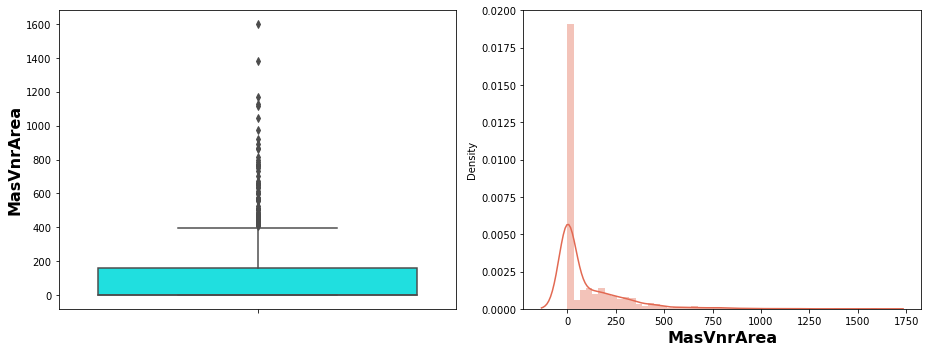

In [53]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'MasVnrArea', data= df, color='cyan')
plt.ylabel('MasVnrArea', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['MasVnrArea'])
plt.xlabel('MasVnrArea', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [54]:
print('Mean of MasVnrArea:',df['MasVnrArea'].mean())
print('Median of MasVnrArea:',df['MasVnrArea'].median())

Mean of MasVnrArea: 102.31007751937985
Median of MasVnrArea: 0.0


# Outliers are Present in MasVnrArea, we know that mean is sensitive to presense of outliers. So we gone imputate with Median.



In [55]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())


In [56]:
df['MasVnrArea'].isnull().any()


False

# Final Missing Value Check


In [57]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
FullBath                    0             0.0
Fireplaces                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
BsmtHalfBath                0             0.0
MSSubClass                  0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
GarageType                  0             0.0
GarageYrBlt                 0             0.0
GarageFinish                0     

# Statistical Matrix


In [58]:
df.describe().T.style.background_gradient(subset = ['mean','std','count'], cmap = 'gist_earth')


,count,mean,std,min,25%,50%,75%,max
Id,1168.000000,724.136130,416.159877,1.000000,360.500000,714.500000,1079.500000,1460.000000
MSSubClass,1168.000000,56.767979,41.940650,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1168.000000,70.807363,22.440317,21.000000,60.000000,70.000000,79.250000,313.000000
LotArea,1168.000000,10484.749144,8957.442311,1300.000000,7621.500000,9522.500000,11515.500000,164660.000000
OverallQual,1168.000000,6.104452,1.390153,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1168.000000,5.595890,1.124343,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1168.000000,1970.930651,30.145255,1875.000000,1954.000000,1972.000000,2000.000000,2010.000000
YearRemodAdd,1168.000000,1984.758562,20.785185,1950.000000,1966.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,1168.000000,101.696918,182.218483,0.000000,0.000000,0.000000,160.000000,1600.000000
BsmtFinSF1,1168.000000,444.726027,462.664785,0.000000,0.000000,385.500000,714.500000,5644.000000


# Observation:
* By comparing 75% and max column we can conclude that some of the feature contain outliers.
* By looking at Mean & Median columns we can say that some of features are left skewed while others are right skewed.
* Oldest Property is built in 1875 while recent property build in 2010.

In [59]:
df.describe(include=object).style.background_gradient(cmap='gist_summer_r')


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,5,2,4,4,1,5,3,25,9,8,5,8,6,8,14,15,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,928,1164,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,703,717,1022,516,547,1071,787,375,1033,1143,585,1090,1070,578,1085,755,551,1114,1125,1071,999,945


# Feature Extraction for Property Age Related Features


In [60]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [61]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

# Data Cleaning & Preprocessing on Test Dataset


In [62]:
# Reading Test Dataset
dft = pd.read_csv('test.csv')

In [63]:
print('No. of Rows :',dft.shape[0])
print('No. of Columns :', dft.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
dft.head()

No. of Rows : 292
No. of Columns : 80


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# Missing Value Imputation in Test Dataset


In [64]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                    292      100.000000
MiscFeature               282       96.575342
Alley                     278       95.205479
Fence                     248       84.931507
FireplaceQu               139       47.602740
LotFrontage                45       15.410959
GarageType                 17        5.821918
GarageYrBlt                17        5.821918
GarageQual                 17        5.821918
GarageCond                 17        5.821918
GarageFinish               17        5.821918
BsmtCond                    7        2.397260
BsmtFinType2                7        2.397260
BsmtFinType1                7        2.397260
BsmtQual                    7        2.397260
BsmtExposure                7        2.397260
MasVnrArea                  1        0.342466
MasVnrType                  1        0.342466
Electrical                  1        0.342466
HalfBath                    0        0.000000
BsmtFullBath                0     

In [65]:
# Removing columns with high missing value percentage
dft.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [66]:
dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].median())
dft['GarageType'] = dft['GarageType'].fillna(dft['GarageType'].mode()[0])
dft['GarageYrBlt']= dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mode()[0])
dft['GarageFinish']= dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual'] = dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond'] = dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])
dft['BsmtFinType2'] = dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['BsmtExposure'] = dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtCond'] = dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtQual'] = dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])
dft['MasVnrType'] = dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].median())
dft['Electrical'] = dft['Electrical'].fillna(dft['Electrical'].mode()[0])

In [67]:
dft.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [68]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
GarageType                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
FullBath                    0             0.0
BsmtHalfBath                0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
Fireplaces                  0             0.0
GarageYrBlt                 0             0.0
Heating                     0             0.0
GarageFinish                0     

# No Missing Value Present in Test Dataset



In [69]:
# Converting years column to age column
dft['Year_SinceBuilt'] = dft['YearBuilt'].max() - dft['YearBuilt']
dft['Year_SinceRemodAdded'] = dft['YearRemodAdd'].max() - dft['YearRemodAdd']
dft['Year_Since'] = dft['YrSold'].max() - dft['YrSold']
dft['GarageAge'] = dft['GarageYrBlt'].max() - dft['GarageYrBlt']

In [70]:
# Dropping old columns in train dataset
dft.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

# Exploratory Data Analysis


* We know that lot of factors which influences in determination of housing price. One by One we will here explore different factors & its relation to target Variable SalePrice.

# How Zone affect House Price?


* Location of House including infrastructure, availability of public utilities, Street Size & Street Type are vital for buying house in terms in determination of Price of house.

# MSZoning Description :-


# MSZoning: Identifies the general zoning classification of the sale.

 

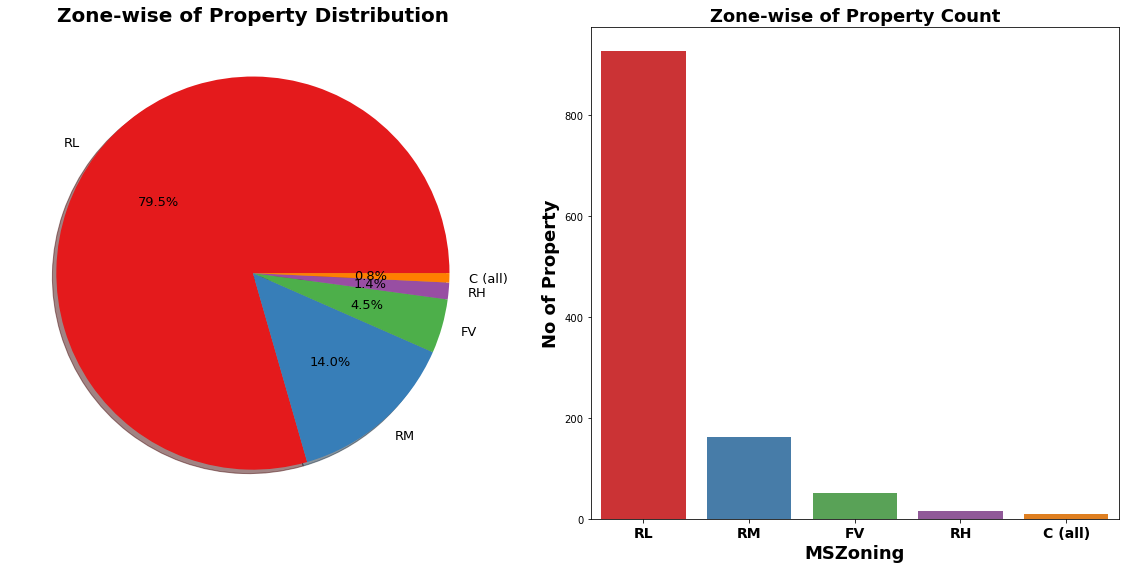

In [71]:
# Exploring MSZoning Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation:
* 79.5% of House properties belongs to Low Density Residential Area followed by 14 % of properties belong to Medium Density Residential Area.
* Very Few property (0.8%) belongs to Commerical zone.

# Lets explore Zone relation with respect to Sale Price



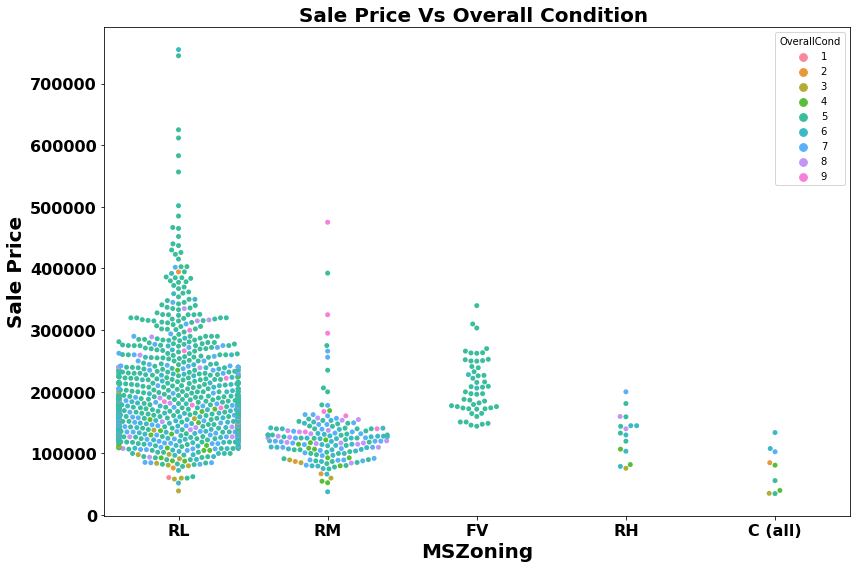

In [72]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['MSZoning'], hue =df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation :
* Most of property for sale have overall condition rating of either 5 or 6.
* We already know of 80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.
* Cheapest properties are available in Commerical zone.
* Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low price compare to others. This indicate that Overall Condition Rating is Not significant factor in determination of Sale price. Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.
* There may be other factors like Street Size or House Size may have major correlation with Sale Price.

# LotFrontage: Linear feet of street connected to property

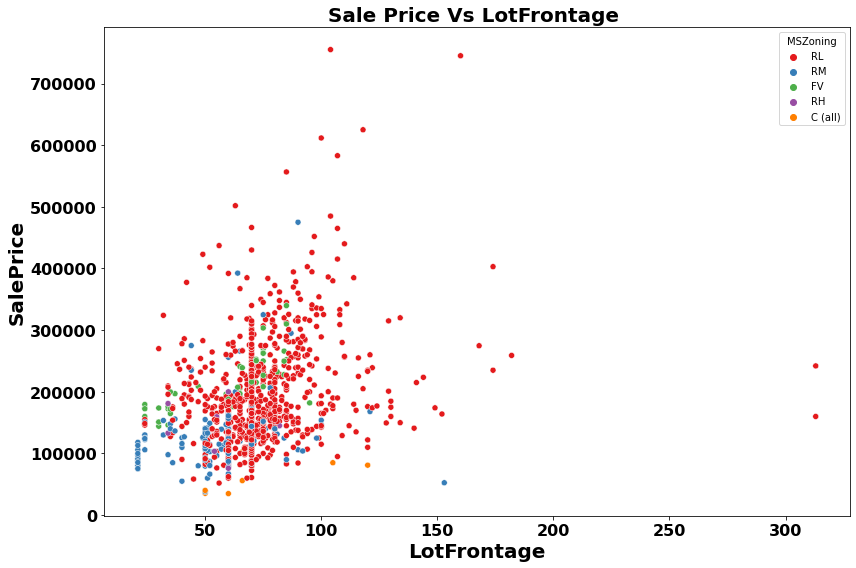

In [73]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation:
* With Exception of Commerical zone, As Lot Frontage area increase (which indicate Size of street connected to property) the Sale Price increases.

# How Quality & Area of house affect Pricing?


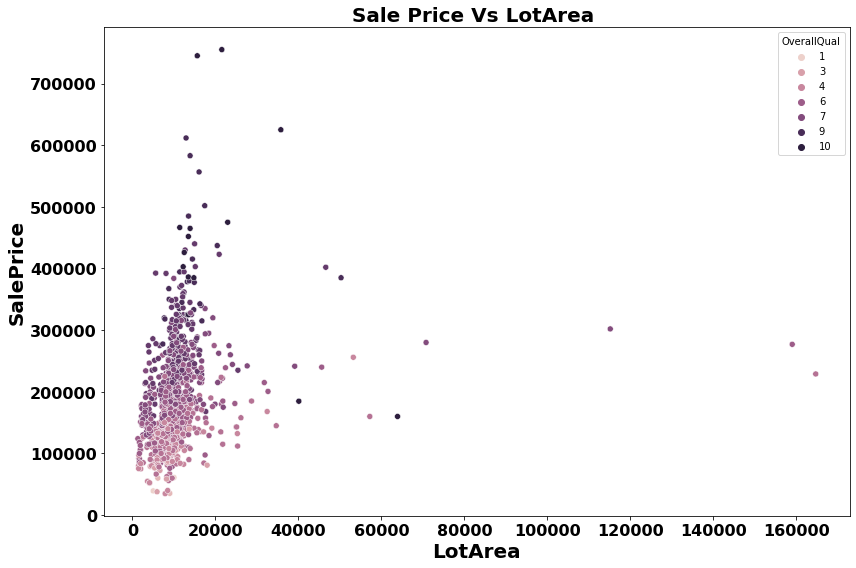

In [74]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation:
* There is No Significant relationship found between Sale price & Lot area.

# Here we get Important Observation that -

***As Overall Quality of House Increase the Sale Price of House also Increases.***



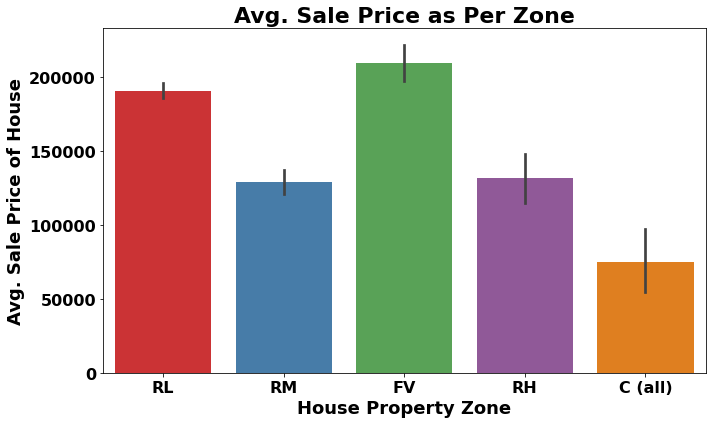

In [75]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = df['SalePrice'], x= df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation :
* In terms of Average Sale price house properties belonging to Floating Village Residential Zone are costiler than rest

# Effect of Land characteristics on Sale Price


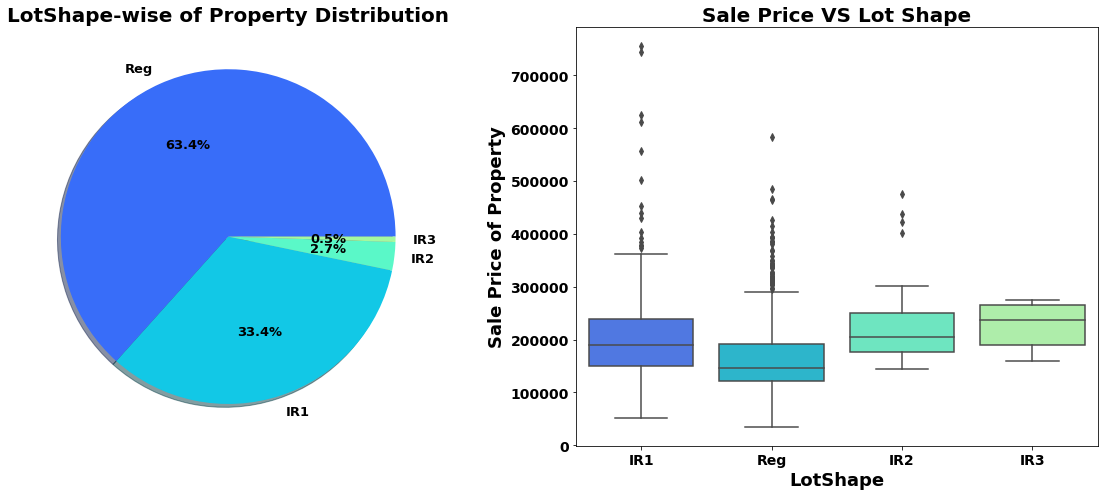

In [76]:
# Exploring LotShape Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotShape-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotShape",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :
* 63.4% house properties are regular in shape.
* Sale Price of property with slight irregular shape is higher than regular shape.

# Land Contour Description :

# LandContour: Flatness of the property

   

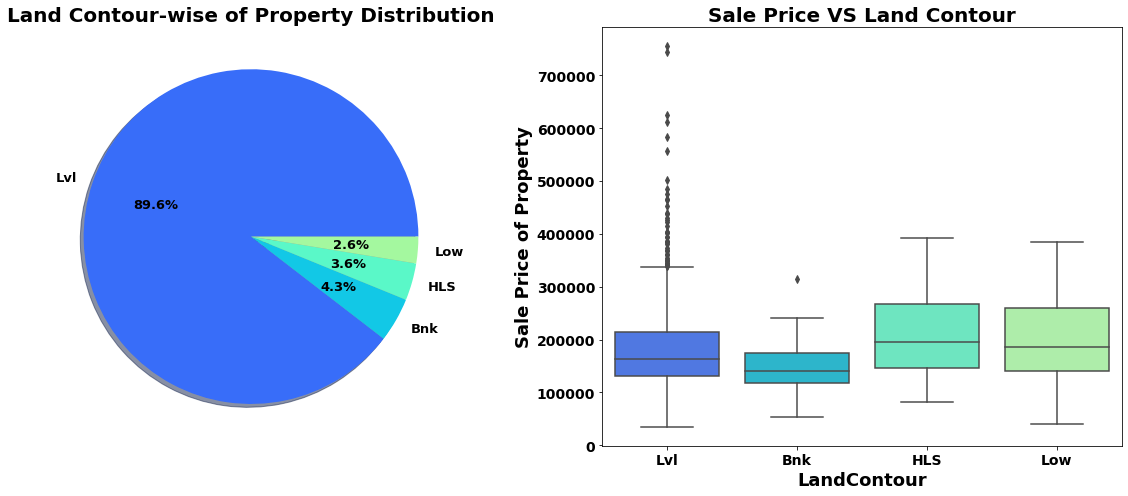

In [77]:
# Exploring LandContour Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandContour'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Land Contour-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandContour",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :
* 89.6% of House properties are near flat level surface.
* Also price for Flat level surface house is much higher than other land contour.

# LotConfig Description :-

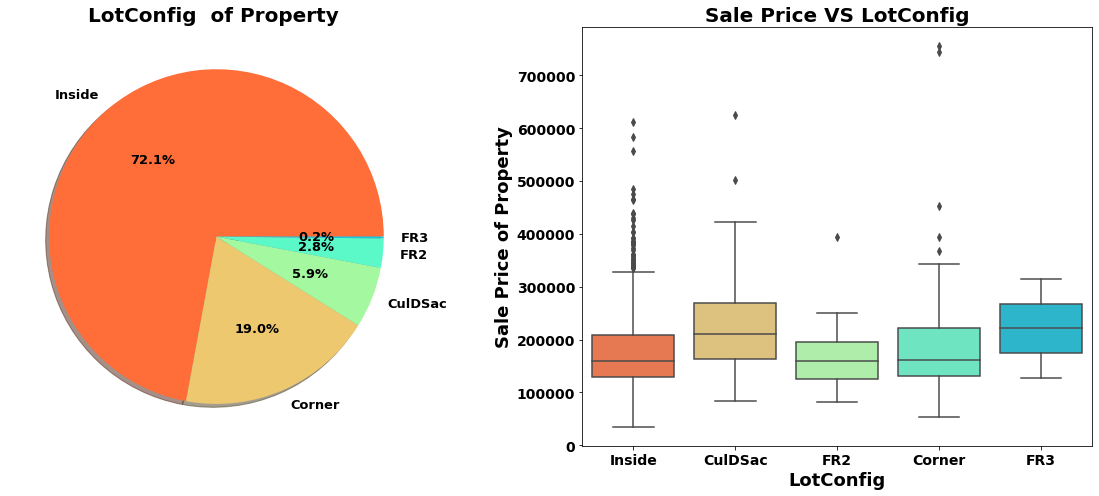

In [78]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotConfig'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotConfig",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :-
* Around 72 % of house comes with inside Lot configuration.
* Cul-de-sac has maxmium Mean Sale Price among all lot configuration.
* Cheapest Houses belong to Inside lot configuration while Costlier houses belongs to Corner Lot Configuration.
# LandSlope Description :-

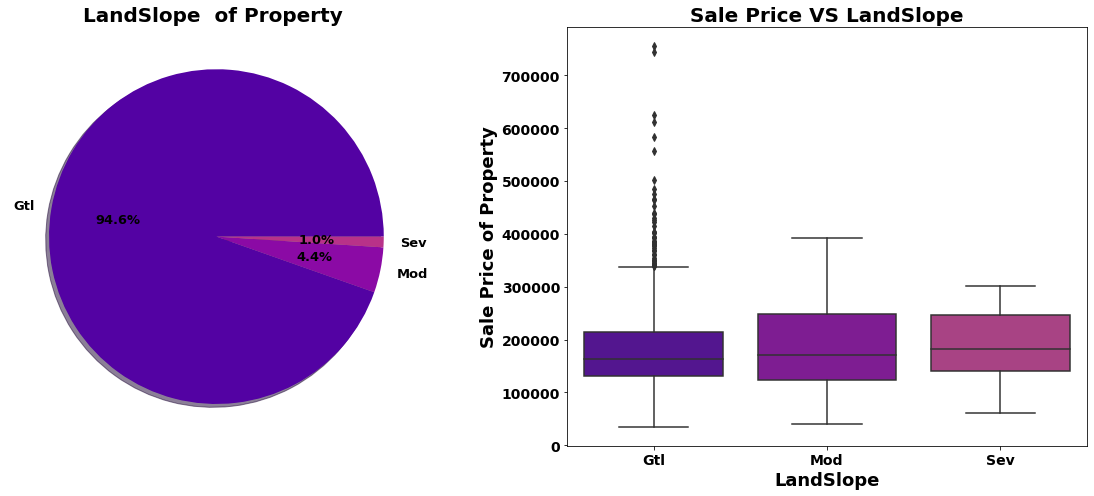

In [79]:
# Exploring LandSlope Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandSlope'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandSlope",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :
* Clearly we can see in boxplot that as Land slope increases the Sale price of house decreases.
* 1% properties come with severe slope and they come with low price compare to Gentle Slope properties.
* Effect of Building Style on Sale Price
# BldgType Description :-
* BldgType: Type of dwelling

# HouseStyle Description :-
# HouseStyle: Style of dwelling

In [80]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]


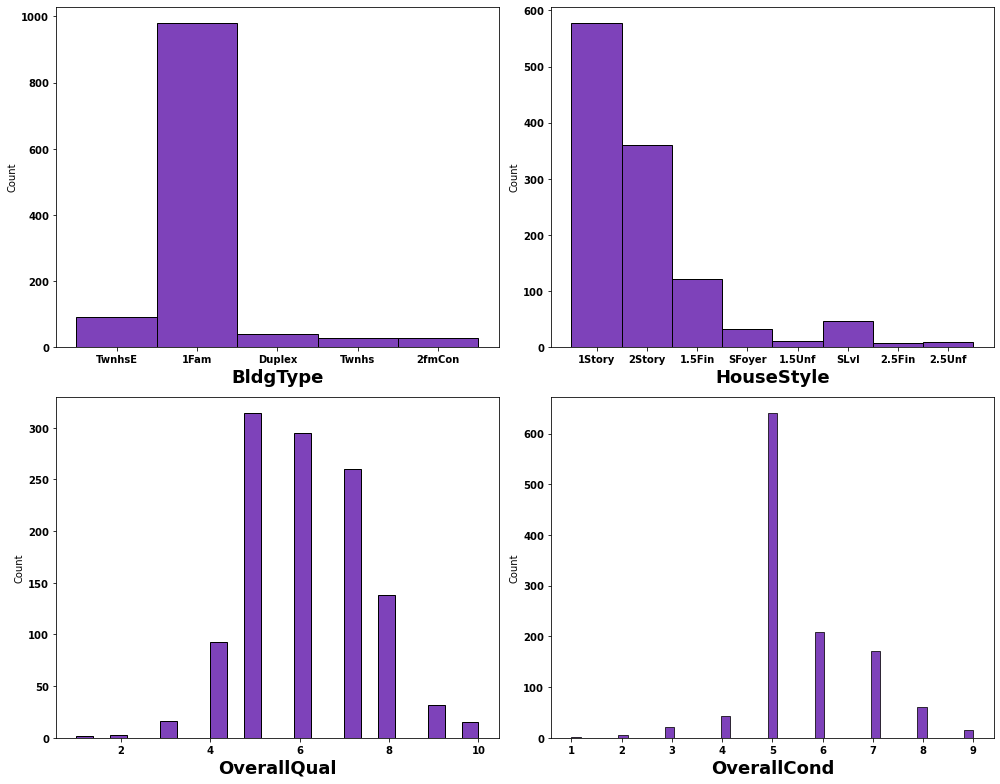

In [81]:
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

# Observation :
* More than 950 house properties are with building type Single-family Detached
* More than 50% of house properties comes with Overall Condition Rating of 5.
* More than 75% of house properties come with overall Quality Rating varies between 5 to 6.
* More than 500 House Properties comes with one story dwelling.

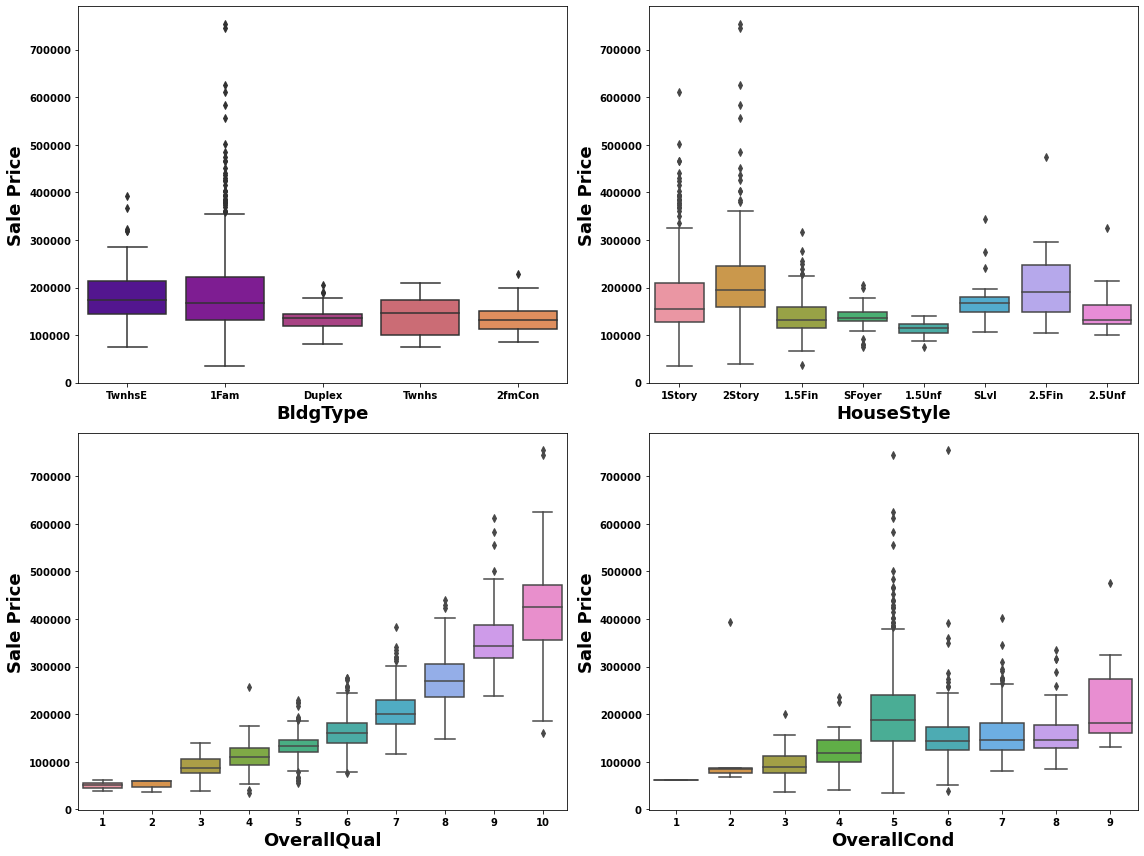

In [82]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

# - **AS Overall Quality increases the sale price also increase with it.**

In [83]:
df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [84]:
Feature_grp2 = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]

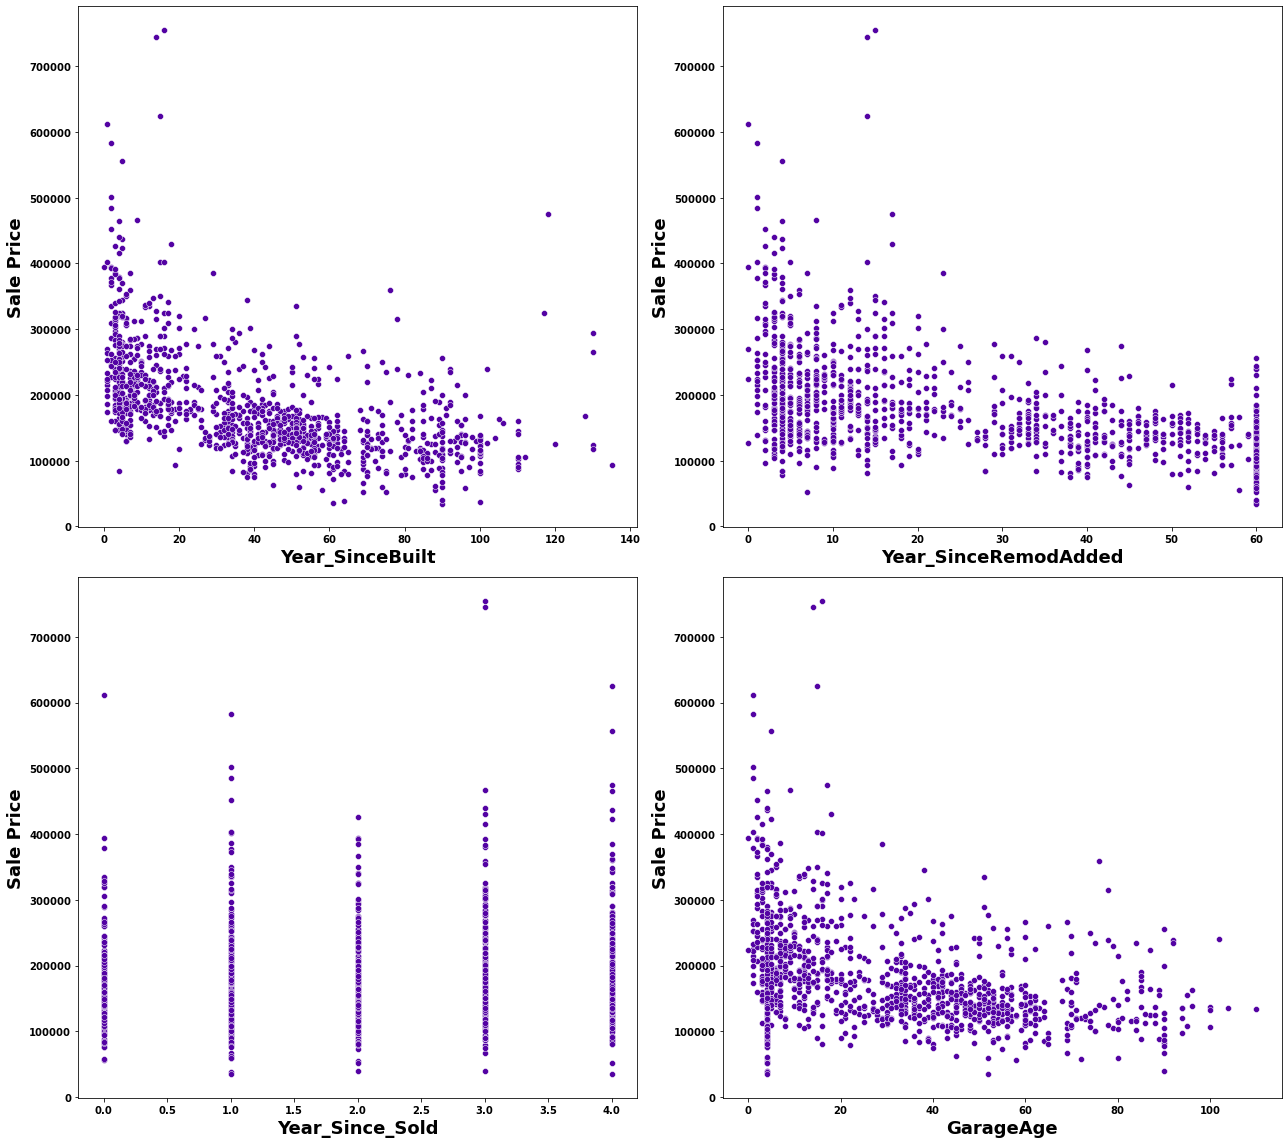

In [85]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

# Observation :-
* We can see that as Property get older with time its sale Price get depricates.
* 20 years after Remodelling Price of properties start decreases.
* Older the garage age less the price of Property.
* Sale related features
# SaleType Description :-
# SaleType : Type of sale

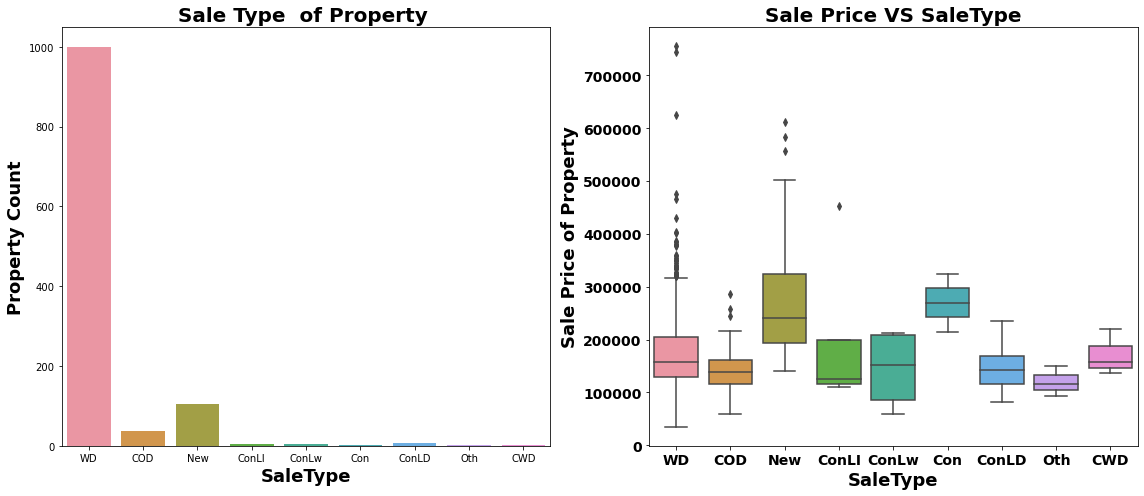

In [86]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleType',data=df,ax=ax[0])
ax[0].set_title('Sale Type  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :-
* Around 1000 sales happen by Conventional Warranty Deed.
* Home just constructed and sold category are exceptionally much costiler than any one else.
* All loan based sale are below 300000.
# SaleCondition Description :-
* SaleCondition: Condition of sale

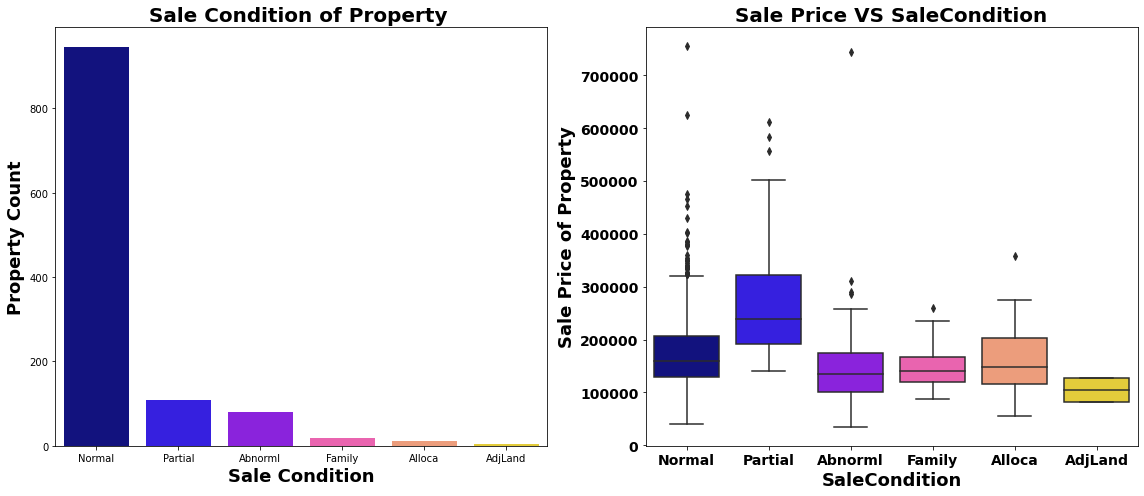

In [87]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleCondition',data=df,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# bservation :-
* We can see that Sale with condition like Abnorml, Family, Alloca, AdjLand are below the price of 300000.
* Maximum Base Price for House comes from Partial category- Home was not completed when last assessed (associated with New Homes) is higher than rest.
* Minimum base price comes from Normal condition sale and also highest sale price comes from this category.
* Investigation of Relation between Floor Area and Sale Price
* It is common known fact that as Floor area increases the cost of Properties get increases.

* Some of Property are single story while others are 2 story. In this Section we will explore relation between Grand Total Floor space (in square feet ) with Sale Price

# Note - We also know as Quality Rating increase Price of House increase so we incorparate Overall Quality Rating in exploration.

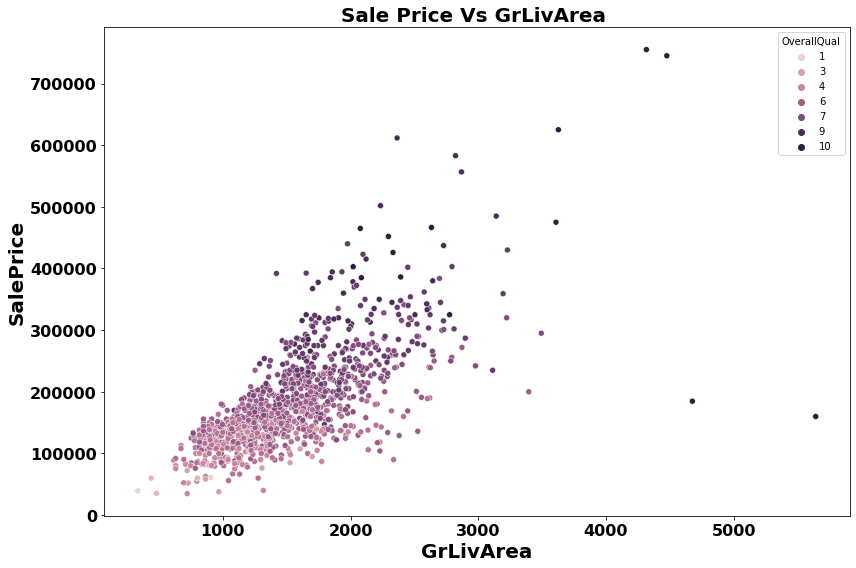

In [88]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs GrLivArea ",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation :-
* In above plot we can clearly see relation between all three feature very clearly.

* As total floor area increases the sale price also get increases corresponding the overall quality of House.

# RoofStyle Description :-
# RoofStyle: Type of roof


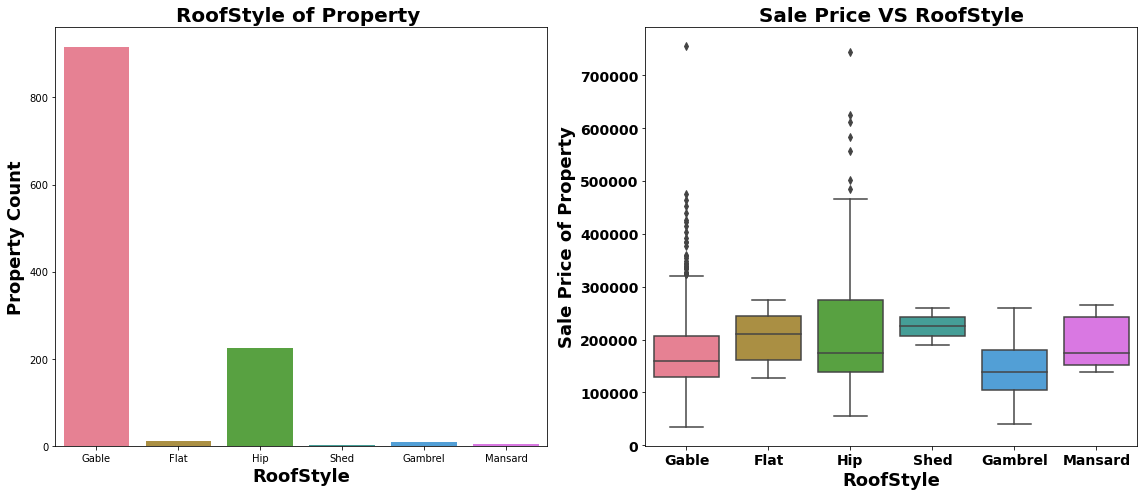

In [89]:
# Exploring RoofStyle Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('RoofStyle',data=df,ax=ax[0])
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofStyle'], ax=ax[1])
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :-
* More than 75% House properties come with Gable Roof Style followed by around 15 % house properties with Hip Style.
* From Boxplot we can see that Hip style Roof are much costlier than remaining roof style.

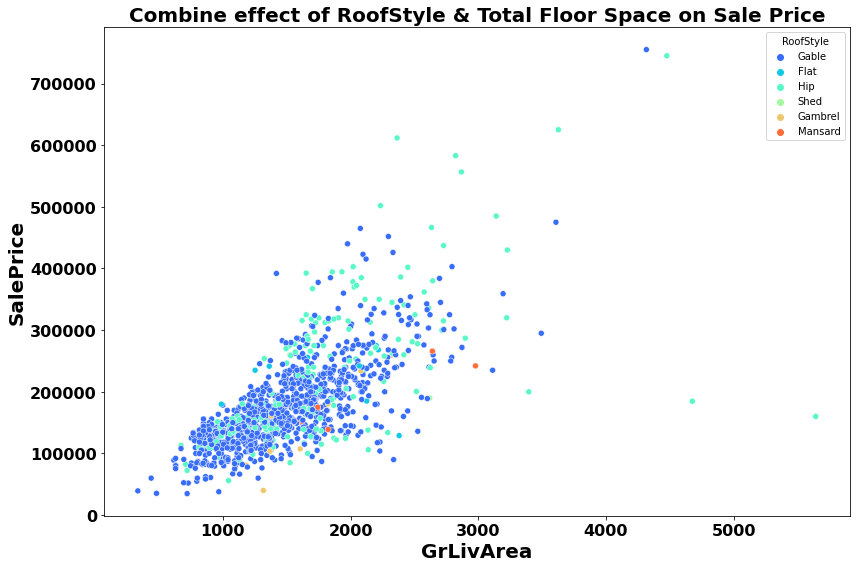

In [90]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofStyle'])
plt.title("Combine effect of RoofStyle & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation :-
* For High floor area construction mainly Hip style Roof is used and invariably high cost properties mostly comes up with Hip Style Roof.

# RoofMatl Description :-
# RoofMatl: Roof material

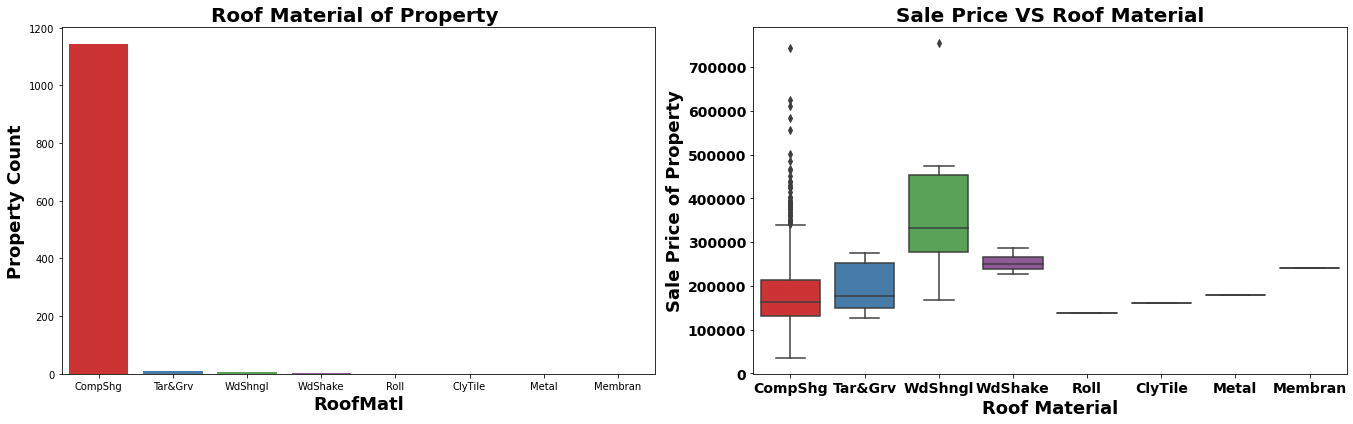

In [91]:
# Exploring RoofMatl Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(19,6))
sns.countplot('RoofMatl',data=df,ax=ax[0])
ax[0].set_title('Roof Material of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofMatl', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofMatl'], ax=ax[1])
ax[1].set_title('Sale Price VS Roof Material',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Roof Material",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()


# Observation :-
* More than 90% Properties in Data set made with roof material of Standard (Composite) Shingle.
* Wood Shingles is Costiler Material compare to rest.

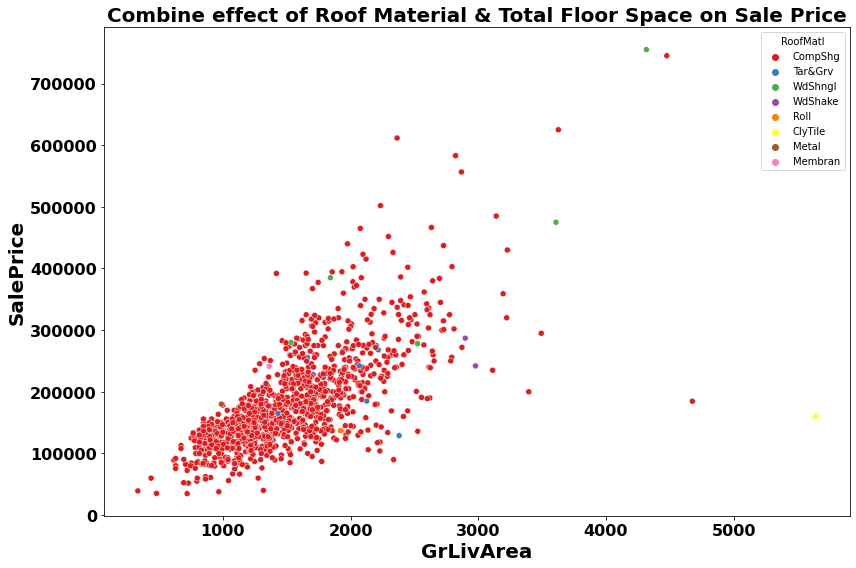

In [92]:
# Combine effect of RoofMatl & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofMatl'])
plt.title("Combine effect of Roof Material & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Exploration of House Exterior covering features


In [93]:
Feature_grp3 = ["Exterior1st","Exterior2nd", "MasVnrType", "ExterQual", "ExterCond"]


# Exterior Quality Description :-
* ExterQual: Evaluates the quality of the material on the exterior

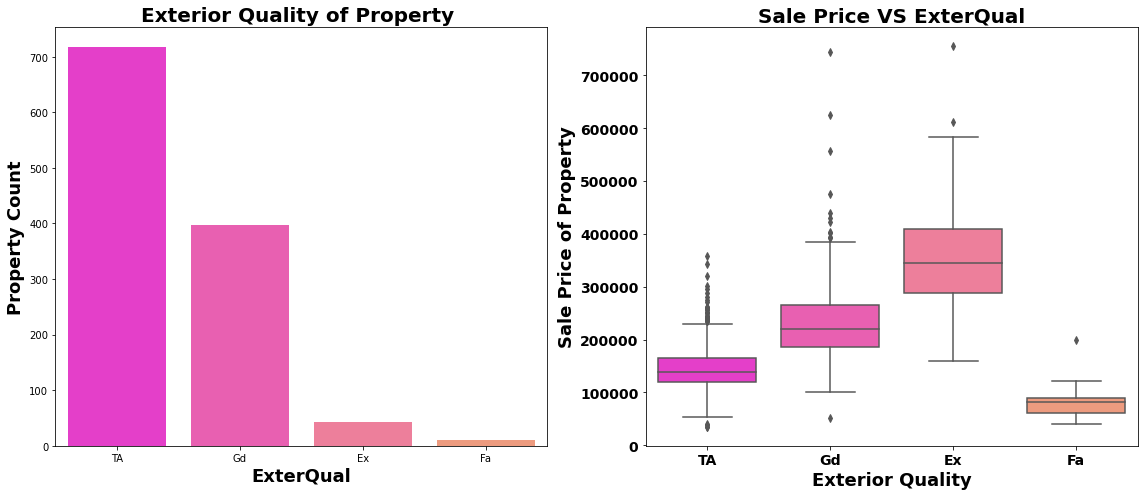

In [94]:
# Exploring ExterQual Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterQual',data=df,ax=ax[0])
ax[0].set_title('Exterior Quality of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('ExterQual', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterQual'], ax=ax[1])
ax[1].set_title('Sale Price VS ExterQual',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior Quality",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :-
* Around 60% of house properties come with Average Exterior quality and all of them below 400000.
* Very few House Properties comes with Excellent Exterior Quality.
* Costiler house properties come with Good & Excellent exterior quality.
# ExterCond Description :-
* ExterCond: Evaluates the present condition of the material on the exterior

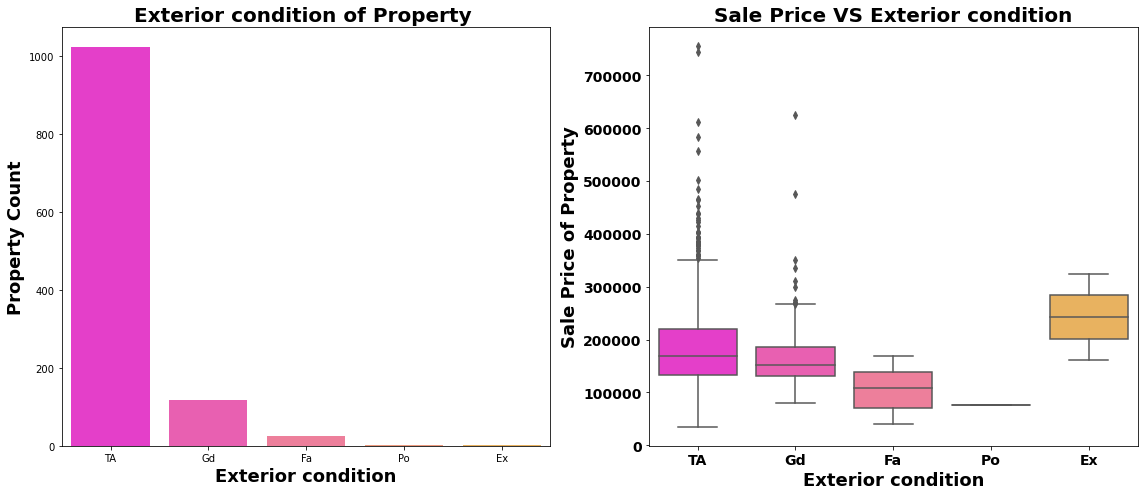

In [95]:
# Exploring Exterior condition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterCond',data=df,ax=ax[0])
ax[0].set_title('Exterior condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Exterior condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterCond'], ax=ax[1])
ax[1].set_title('Sale Price VS Exterior condition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior condition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Foundation Vs Sale Price
# Foundation Description :-
* Foundation: Type of foundation

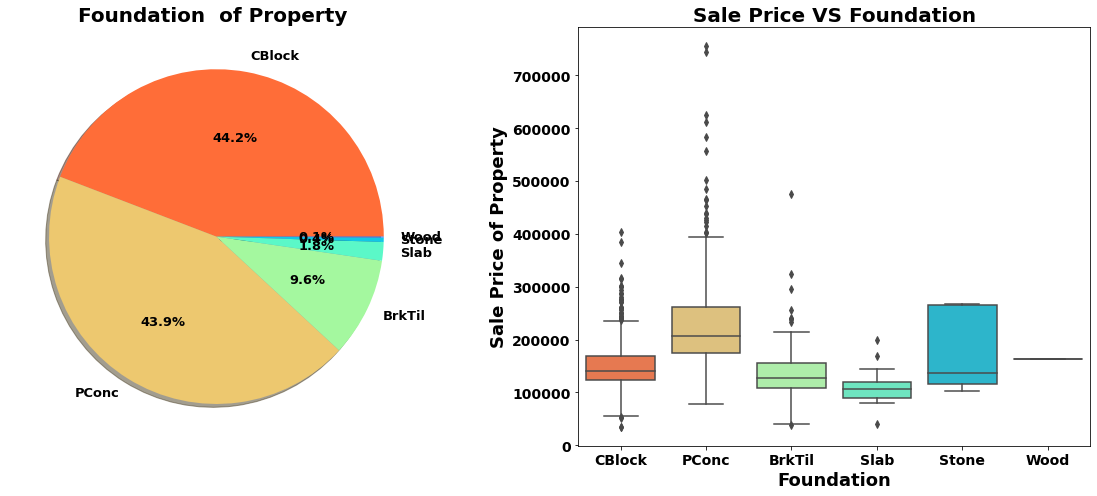

In [96]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Foundation'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Foundation  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['Foundation'], ax=ax[1])
ax[1].set_title('Sale Price VS Foundation',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Foundation",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Observation :-
* 44.2% Properties with CBlock Foundation & 43.9% housing property come with PConc Foundation.
* Pconc Foundation are mostly use in costily housing properties.
# Exploration of Basement related features

In [97]:
Feature_grp4= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

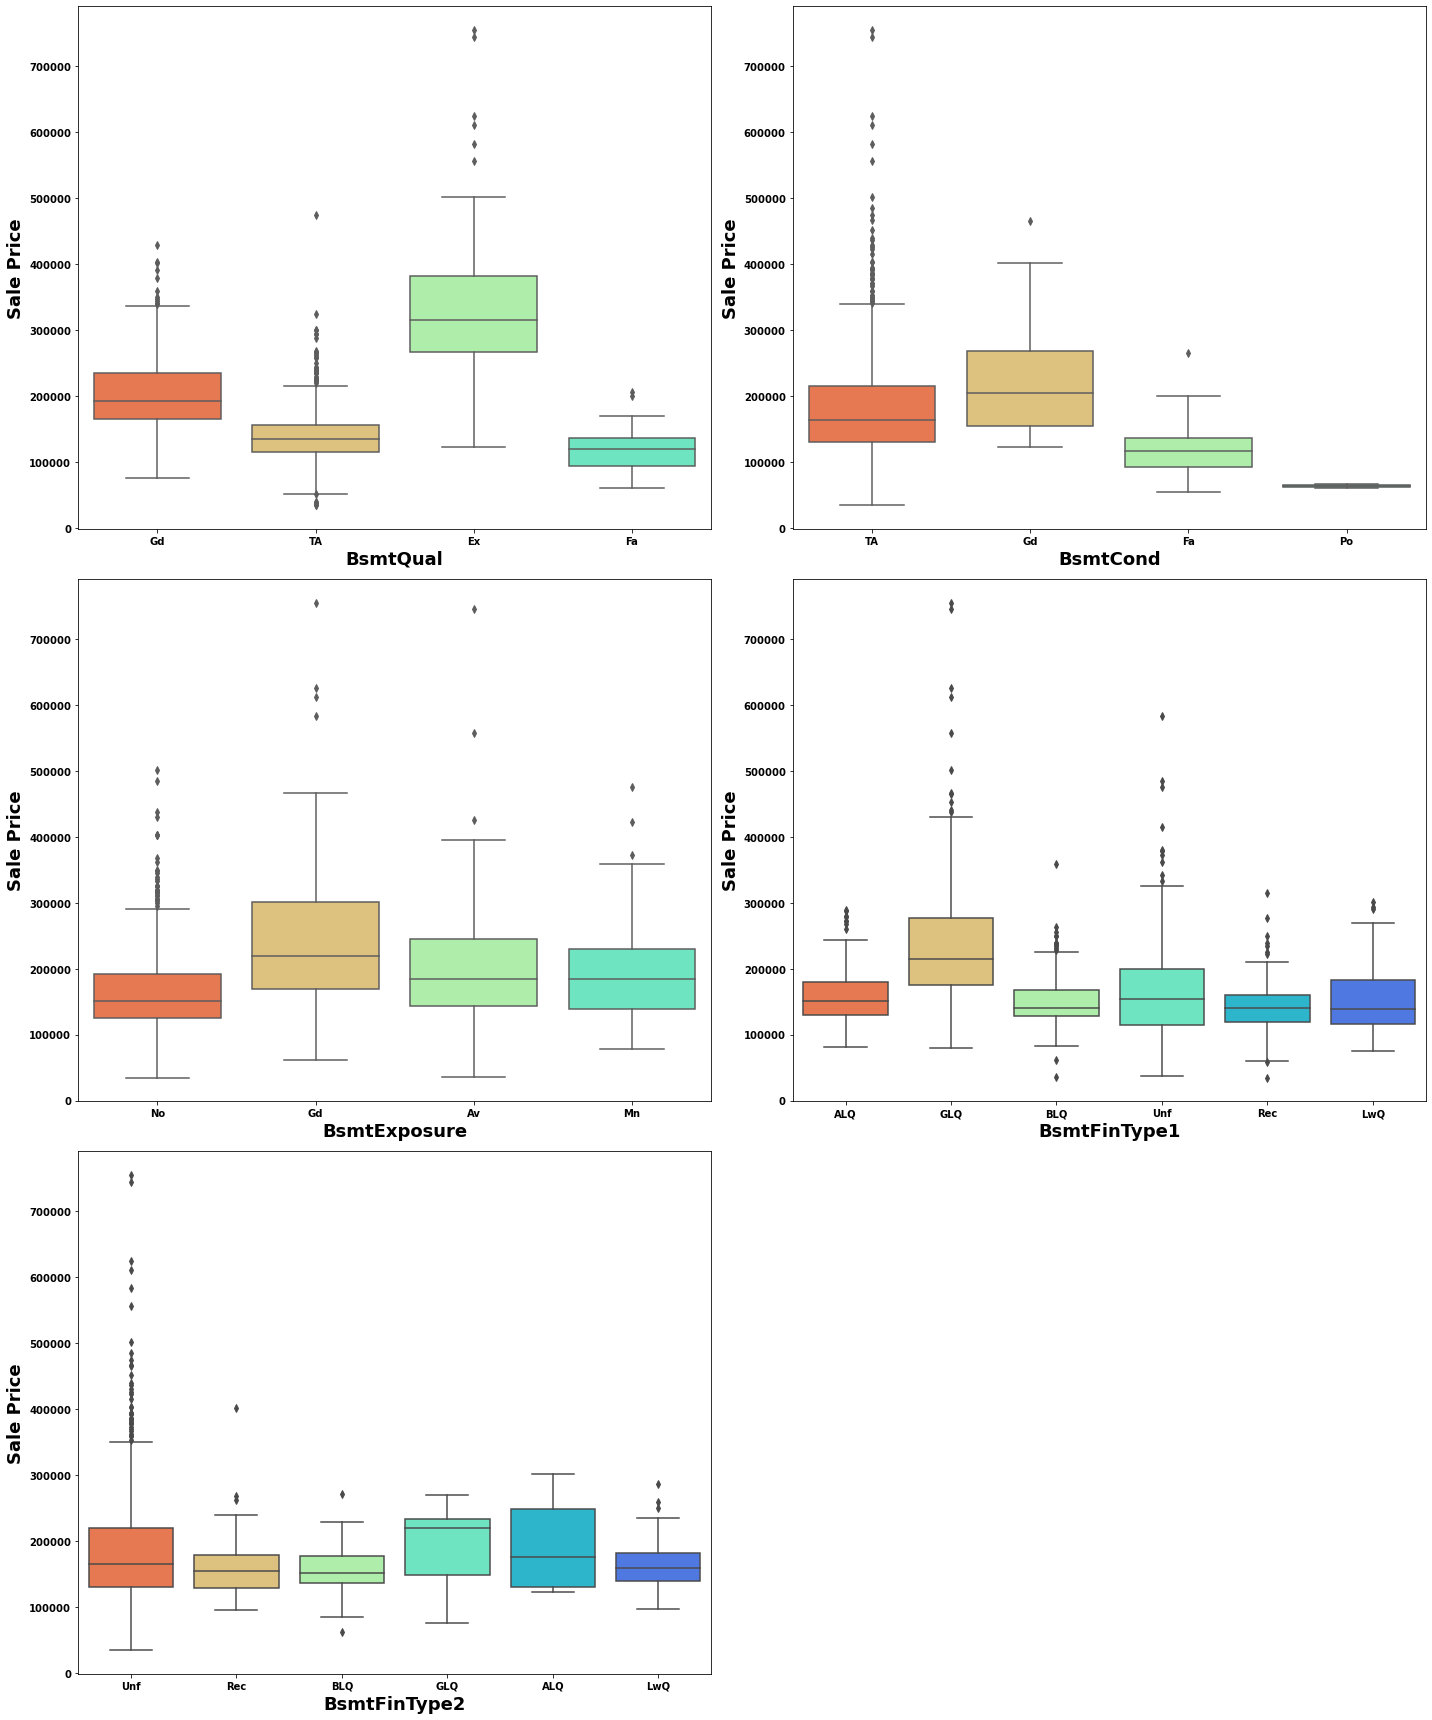

In [98]:
plt.figure(figsize=(20,24),facecolor='white')
plotnumber=1

for i in Feature_grp4:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

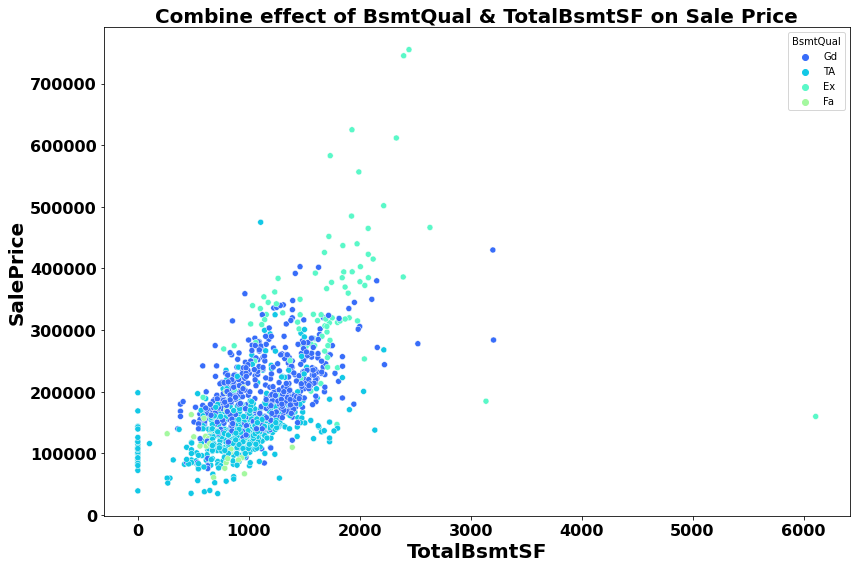

In [99]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['TotalBsmtSF'], hue =df['BsmtQual'])
plt.title("Combine effect of BsmtQual & TotalBsmtSF on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('TotalBsmtSF',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation :-
* As Basement Quality increase in relatio to it sale Price increases.

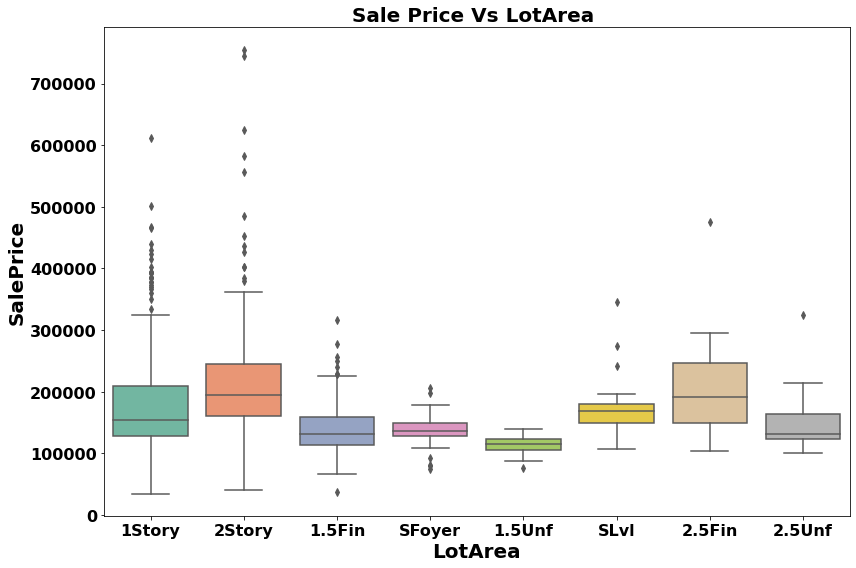

In [100]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set2')
plt.figure(figsize=(12,8))
sns.boxplot(y=df['SalePrice'], x=df['HouseStyle'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

* Two Story Building are costlier than remaining.

# Feature Engineering


In [101]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
180       3
120       3
168       3
160       3
126       3
144       2
288       2
176       2
142       2
184       2
147       2
100       2
200       2
90        2
216       2
260       1
287       1
198       1
170       1
440       1
175       1
385       1
161       1
163       1
197       1
145       1
259       1
143       1
252       1
190       1
291       1
40        1
322       1
154       1
156       1
165       1
60        1
63        1
225       1
95        1
265       1
53        1
480       1
128       1
140       1
410       1
204       1
155       1
182       1
116       1
178       1
185       1
153       1
266       1
222       1
271       1
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, dtype: int64

In [102]:
df['MiscVal'].value_counts()


0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

In [103]:
df['PoolArea'].value_counts()


0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

In [104]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,WD,Normal,128000,34,34,3,33.0
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,WD,Normal,268000,40,40,3,40.0
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,WD,Normal,269790,14,13,3,13.0
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,COD,Normal,190000,33,33,0,33.0
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,WD,Normal,215000,33,10,1,33.0


# 1. Outliers Detection and Removal


In [105]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold'], float64: ['LotFrontage', 'MasVnrArea', 'GarageAge'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageTyp

In [106]:
# Grouping Numerical & Categorical features
Numerical_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold', 
                      'LotFrontage', 'MasVnrArea', 'GarageAge']

Categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

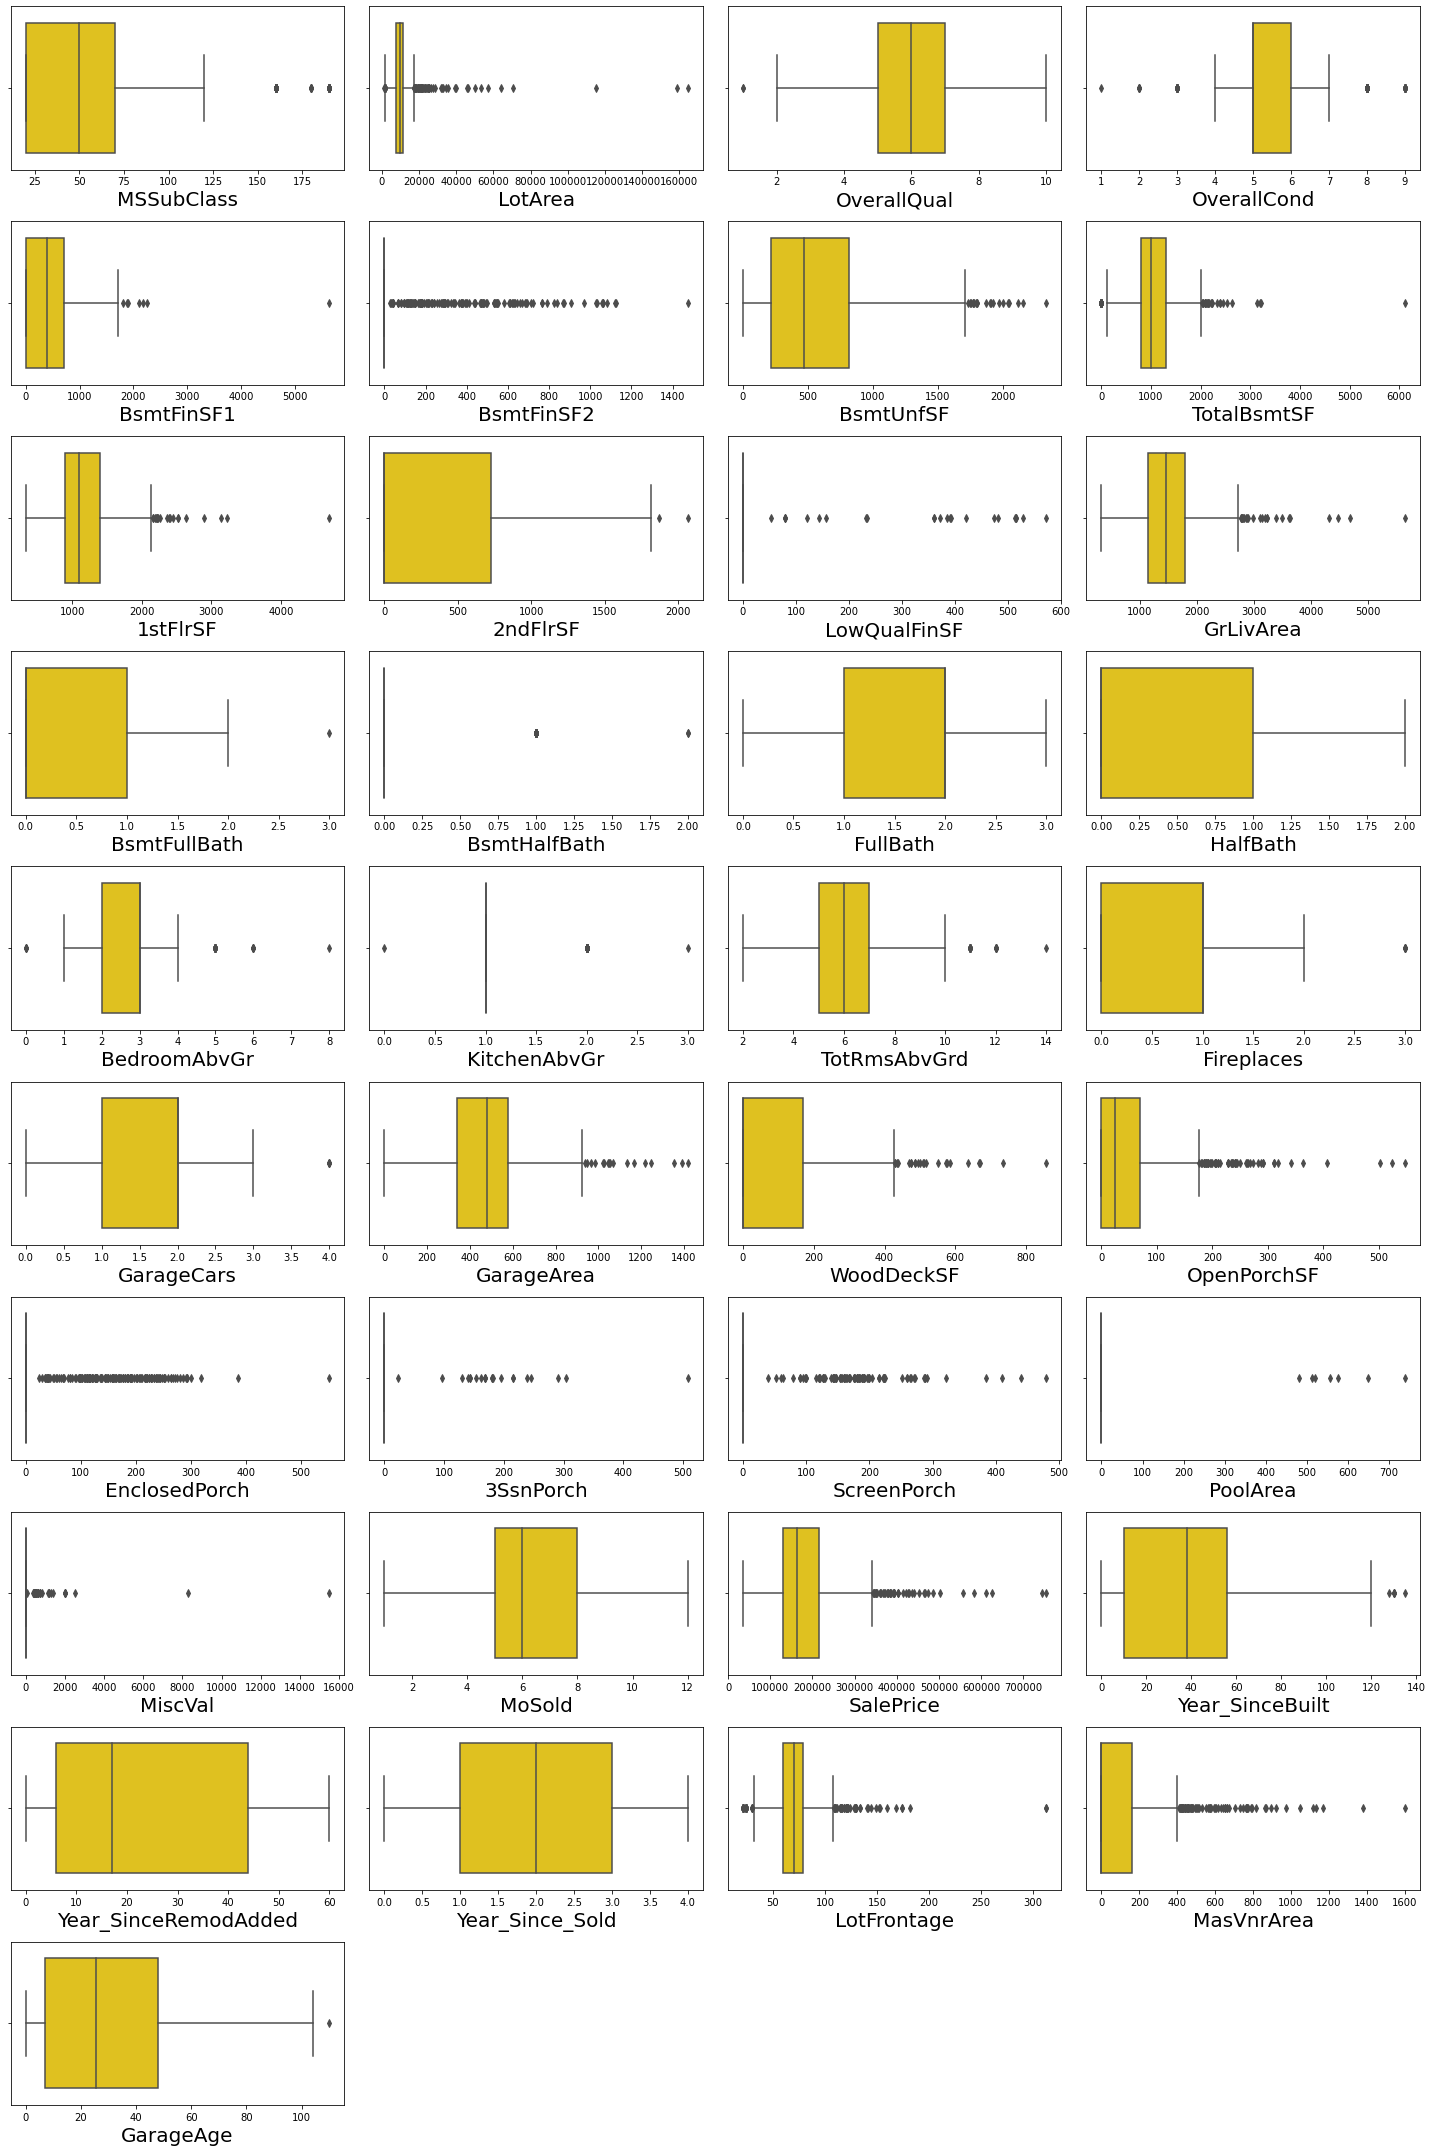

In [107]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# We can see lot of features contain outliers which are in upper bound limit i.e. extreme outliers. We also know that value present in dataset are realsitic in nature, so to gain accuracy of model we cannot afford large data loss.

# We will Not any remove outliers keeping in mindframe data belong in this dataset from 1875.

In [108]:
# Droping unnecessary column for further investigation
df.drop(['Id','Utilities'],axis=1,inplace=True)
dft.drop(['Id','Utilities'],axis=1,inplace=True)

* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
# TotalBsmtSF is sum of above remaining features. We will drop other three features for modelling.

In [109]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
dft.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
# GrLivArea is sum of above remaining features. We will drop other three features for modelling.

In [110]:
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
dft.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

# Some of the features contain lot of zeros (above 90 %), it will meaningless to keep them while model building.

* PoolArea - 1161 zeros out of 1168 entries
* MiscVal - 1126 zeros out of 1168 entries
* 3SsnPorch - 1146 zeros out of 1168 entries
* EnclosedPorch - 999 zeros out of 1168 entries
* ScreenPorch - 1073 zeros out of 1168 entries
* We will drop these columns from dataset.

In [111]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
dft.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

# 2. Corrleation

In [112]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
MSSubClass,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.028215,-0.214042,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,-0.027639,-0.092408,-0.022609,0.017468,-0.016015,-0.060775,-0.023988,-0.056618,0.038595,-0.093390
LotFrontage,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.188273,0.356180,0.374000,0.092807,0.001375,0.171842,0.047149,0.236946,-0.002082,0.318941,0.228494,0.260224,0.322750,0.087267,0.151044,0.022579,0.323851,-0.112000,-0.089513,0.004162,-0.028295
LotArea,-0.124151,0.296790,1.000000,0.107188,0.017513,0.120192,0.259733,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,0.158313,0.195162,0.216720,0.093080,0.015141,0.249499,-0.005506,-0.027228,0.035399,0.054091
OverallQual,0.070462,0.229981,0.107188,1.000000,-0.083167,0.403985,0.528285,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.596322,0.566782,0.227137,0.341030,0.090638,0.789185,-0.575800,-0.555945,0.048759,-0.427205
OverallCond,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.135133,-0.162481,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.161996,-0.126021,0.012290,-0.024899,0.005519,-0.065642,0.377731,-0.080669,-0.055517,0.303182
MasVnrArea,0.028215,0.188273,0.120192,0.403985,-0.135133,1.000000,0.362330,0.384386,0.084498,0.014974,0.264357,0.197831,0.091339,-0.039438,0.277737,0.241040,0.340100,0.363537,0.152083,0.127876,0.012707,0.460535,-0.318562,-0.178583,0.013220,-0.210228
TotalBsmtSF,-0.214042,0.356180,0.259733,0.528285,-0.162481,0.362330,1.000000,0.461067,0.296654,0.009657,0.311120,-0.037014,0.036237,-0.065410,0.273895,0.328241,0.423592,0.492980,0.234848,0.249284,0.032920,0.595042,-0.386265,-0.280720,0.030448,-0.251091
GrLivArea,0.086448,0.374000,0.281360,0.599700,-0.065006,0.384386,0.461067,1.000000,0.036206,-0.013145,0.626275,0.403630,0.509273,0.097929,0.821845,0.464782,0.455707,0.459261,0.242525,0.368318,0.065385,0.707300,-0.198644,-0.295048,0.056401,-0.155869
BsmtFullBath,0.004556,0.092807,0.142387,0.101732,-0.039680,0.084498,0.296654,0.036206,1.000000,-0.150317,-0.070138,-0.020117,-0.149870,-0.034575,-0.055266,0.134348,0.105895,0.166060,0.161772,0.060848,-0.012877,0.212924,-0.164983,-0.104643,-0.060557,-0.085670
BsmtHalfBath,0.008207,0.001375,0.059282,-0.030702,0.091016,0.014974,0.009657,-0.013145,-0.150317,1.000000,-0.029929,-0.009073,0.051000,-0.049367,-0.021023,0.054955,-0.021730,-0.020305,0.051038,-0.050523,0.039928,-0.011109,0.028161,0.011375,0.052576,0.059867


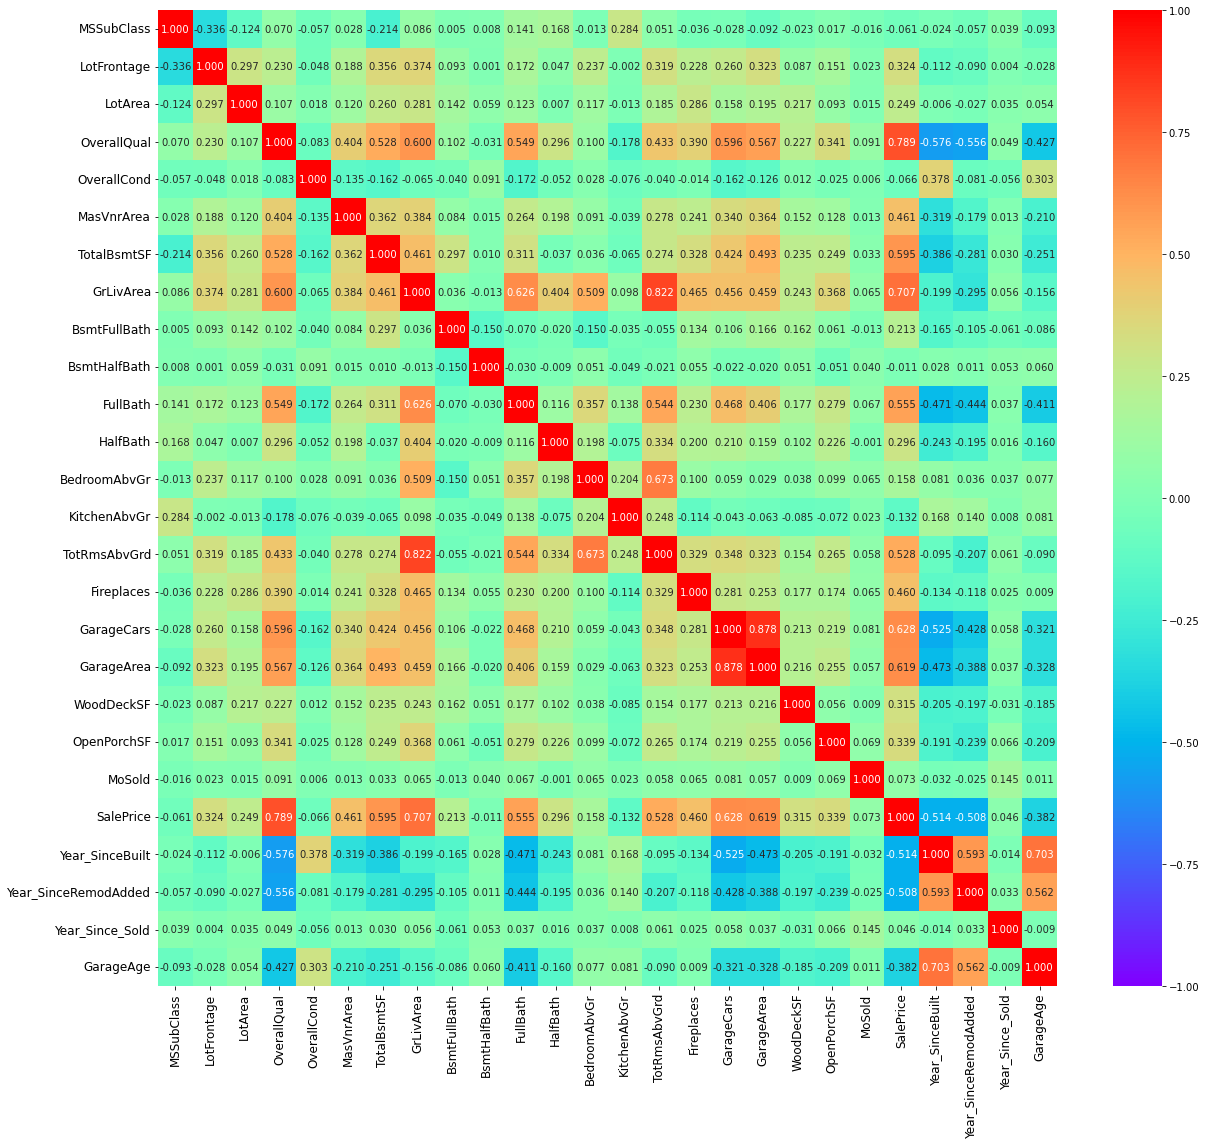

In [113]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=False, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

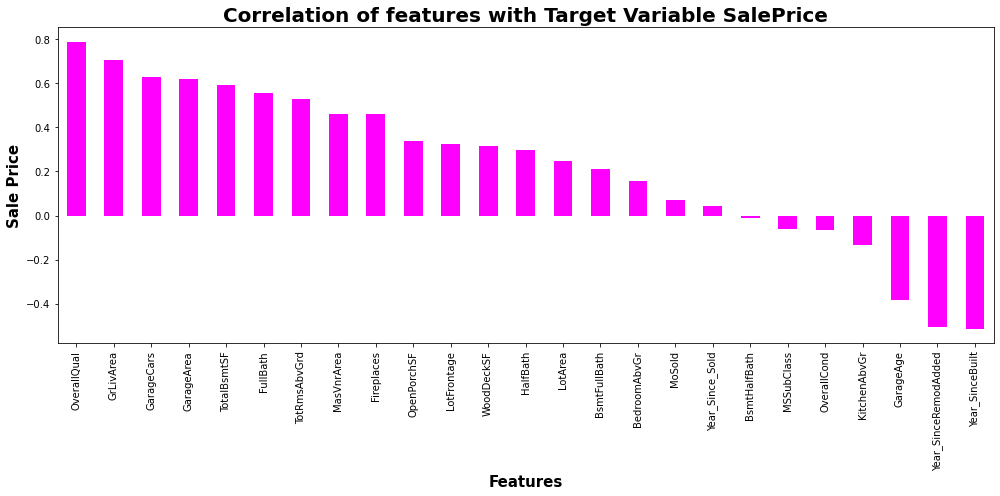

In [114]:
plt.figure(figsize = (14,7))
df.corr()['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Sale Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable SalePrice',fontsize = 20,fontweight='bold')
plt.tight_layout()
plt.show()

# We can see that lot of features are highly correlated with target variable Sale Price.

# 3. Encoding Categorical Features

# 3.1 Encoding for Training data

In [115]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,120,3,70.0,4928,1,0,3,4,0,13,2,2,4,2,6,5,1,1,8,9,2,0.0,3,4,1,2,3,3,0,5,1078,1,4,1,4,958,0,0,2,0,2,1,3,5,6,1,1,1,2,440,4,4,2,0,205,2,8,4,128000,34,34,3,33.0
1,20,3,95.0,15865,1,0,3,4,1,12,2,2,0,2,8,6,0,5,12,13,2,0.0,2,2,2,3,1,1,0,4,2217,1,0,1,4,2217,1,0,2,0,4,1,2,8,6,1,1,2,2,621,4,4,2,81,207,10,8,4,268000,40,40,3,40.0
2,60,3,92.0,9920,1,0,3,1,0,15,2,2,0,5,7,5,1,1,7,7,2,0.0,2,4,2,2,3,0,2,5,1117,1,0,1,4,2013,1,0,2,1,3,1,3,8,6,1,1,2,2,455,4,4,2,180,130,6,8,4,269790,14,13,3,13.0
3,20,3,105.0,11751,1,0,3,4,0,14,2,2,0,2,6,6,3,1,8,9,1,480.0,3,4,1,2,3,3,1,5,1844,1,0,1,4,1844,0,0,2,0,3,1,3,7,6,1,1,1,2,546,4,4,2,0,122,1,0,4,190000,33,33,0,33.0
4,20,3,70.0,16635,1,0,3,2,0,14,2,2,0,2,6,7,1,1,4,4,3,126.0,2,4,1,2,3,3,0,5,1602,1,2,1,4,1602,0,1,2,0,3,1,2,8,6,1,1,0,2,529,4,4,2,240,0,6,8,4,215000,33,10,1,33.0


# 3.2 Encoding for Testing data

In [116]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    dft[i] = le.fit_transform(dft[i])
dft.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since,GarageAge
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,3,0,9,11,3,200.0,2,3,2,0,2,1,2,5,1922,0,0,1,3,1922,1,0,2,0,3,1,2,8,5,1,1,0,3,676,4,4,2,178,51,7,5,2,4,4,3,5.0
1,120,2,65.0,5814,1,0,3,1,0,21,2,0,4,2,8,5,1,0,5,5,2,0.0,2,3,1,2,2,0,2,5,1220,0,2,1,3,1360,1,0,1,0,1,1,2,4,5,1,1,1,2,565,4,4,2,63,0,8,0,0,25,26,1,26.0
2,20,2,65.0,11838,1,3,3,4,0,4,2,0,0,2,8,5,3,0,9,11,2,0.0,2,3,2,2,2,0,5,5,1753,0,0,1,3,1788,0,0,2,0,3,1,0,7,5,1,1,1,2,522,4,4,2,202,151,6,5,2,8,9,1,9.0
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,1,0,6,7,2,0.0,3,3,1,3,2,3,4,5,704,0,0,1,3,1564,0,0,1,1,3,1,1,7,5,1,1,2,1,234,4,4,2,0,0,7,5,2,68,60,1,69.0
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,1,0,9,11,3,74.0,2,3,2,2,2,2,5,5,894,0,0,1,3,1933,0,0,2,1,4,1,2,9,5,1,3,0,3,668,4,4,2,100,18,1,5,2,2,3,2,3.0


# 4. Standard Scaling

# 4.1 Standard Scaling for Train Dataset

In [117]:
# Splitting data in target and dependent feature
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

In [118]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# 4.2 Standard Scaling for Test Dataset

In [119]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(dft)

# Machine Learning Model Building


In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (817, 62)
Training Target Vector Size : (817,)
Test Feature Matrix Size: (351, 62)
Test Target Vector Size: (351,)


# Finding best Random state

In [122]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8751862980338239 on Random_state 135


# Linear Regression


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 20097.055793096148
Mean squared error : 868718000.5387536
Root Mean squared error : 29474.022469604544
 R2 Score :
87.51862980338238


In [124]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7662072724233103
Difference in R2 & CV Score: 10.897902561051353


# Random Forest Regressor


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 18083.32347150259
Mean squared error : 689837591.0196083
Root Mean squared error : 26264.75948908743
R2 Score of Random Forest Regressor :
90.08870733227712


In [126]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.834117930209505
Difference in R2 & CV Score: 6.676914311326627


# Decision Tree Regressor


In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 31510.38341968912
Mean squared error : 2640996821.642487
Root Mean squared error : 51390.62970661565
R2 Score of Decision Tree Regressor :
62.05528261349769


In [128]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6752180447604874
Difference in R2 & CV Score: -5.466521862551055


# Extra Trees Regressor


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 17570.250621761657
Mean squared error : 693119595.2063217
Root Mean squared error : 26327.164587291238
R2 Score of Extra Tree Regressor :
90.04155289410983


In [130]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.8289007409620236
Difference in R2 & CV Score: 7.1514787979074725


# Ridge Regression


In [131]:
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rd = Ridge()
rd.fit(X_train, Y_train)
y_pred = rd.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 20090.342142178335
Mean squared error : 868587960.7881691
Root Mean squared error : 29471.816380877666
R2 Score of XGB Regressor :
87.52049815912765


In [132]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rd, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rd,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : Ridge() :

Mean CV Score : 0.7666037684644635
Difference in R2 & CV Score: 10.8601213126813


# XGB Regressor


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 19112.426550356216
Mean squared error : 927210436.1906452
Root Mean squared error : 30450.130314838476
R2 Score of XGB Regressor :
86.67823540310482


In [134]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :

Mean CV Score : 0.8205944138764742
Difference in R2 & CV Score: 4.6187940154573965


# We can see that Random Forest Regressor gives maximum R2 score of 90.50 and with cross validation score of 83.30 %.



# Hyper Parameter Tuning : GridSearchCV


In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=135, test_size=0.33)

In [137]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [138]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [139]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)


In [140]:
GCV.fit(X_train,Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.796 total time=   0.6s
[CV 2/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.865 total time=   0.6s
[CV 3/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.164 total time=   0.6s
[CV 4/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.799 total time=   0.6s
[CV 5/5; 1/30] START bootstrap=True, max_features=auto, min_samples_le

[CV 3/5; 8/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.165 total time=   5.7s
[CV 4/5; 8/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 4/5; 8/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.804 total time=   5.5s
[CV 5/5; 8/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 8/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.849 total time=   5.6s
[CV 1/5; 9/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 9/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.836 total time=   8.1s
[CV 2/5; 9/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 9/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.868 total time=   8.2s

[CV 1/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.677 total time=   1.0s
[CV 2/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.588 total time=   0.9s
[CV 3/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=-0.188 total time=   0.9s
[CV 4/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.701 total time=   0.9s
[CV 5/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 5/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.580 total ti

[CV 3/5; 23/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.005 total time=   8.1s
[CV 4/5; 23/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 4/5; 23/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.710 total time=   8.0s
[CV 5/5; 23/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 23/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.613 total time=   8.2s
[CV 1/5; 24/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 24/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.763 total time=  12.4s
[CV 2/5; 24/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 24/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.588 

[CV 5/5; 30/30] END bootstrap=False, max_features=auto, min_samples_leaf=4, n_estimators=2000;, score=0.628 total time=  13.6s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000, 1500, 2000]},
             verbose=10)

In [141]:
GCV.best_params_


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 2000}

# Final Model

In [142]:
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = True, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 89.12175043141669
mean_squared_error: 757138925.1111383
mean_absolute_error: 17904.839378238343
RMSE value: 27516.157528098618


# Saving Final Model

In [143]:
# Saving the model using .pkl
import pickle
filename="Surprise_Housing_Price_Prediction.pkl"
pickle.dump(Final_mod, open(filename,'wb'))